In [35]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from xgboost import XGBRegressor



In [26]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
trainY = train_df['target']
# create one data frame with everything, dropping the target
alldata = pd.concat([train_df.drop(['target'],axis=1), test_df])

Above, I have my training and testing data, as well as import statements.
Below I'll preview the data and check for missing values.

In [27]:
alldata.head()
# Check missing
alldata.isna().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

There are no missing values, which makes things a lot easier for this project.

To make the model work I'll need to encode the categorical variables.

In [28]:
categorical = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
alldata = pd.get_dummies(alldata)

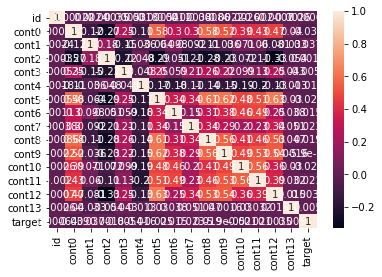

In [29]:
correlation = train_df.corr()
heatmap = sns.heatmap(correlation, annot=True)

This is the correlation matrix. Now onto the model

In [36]:
trainX = alldata.head(300000)
testX=alldata.tail(200000)
model = XGBRegressor()
model.fit(trainX, trainY)
prediction = model.predict(testX)
output=pd.DataFrame()
output['id'] = testX['id']
output['target'] = prediction
output.to_csv('xgb.csv', index=False)
